<a href="https://colab.research.google.com/github/HyeJeongIm/BP_Project/blob/main/_BP_hv3_4(2)(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# batch_size

In [ ]:
import h5py
# from vis.visualization import visualize_cam, overlay
from tensorflow.keras import activations
#from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow.compat.v1 as tf
import tensorflow.keras as keras
# from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta, Nadam
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
TensorFlow version :  2.3.0
Keras version :  2.4.0


In [ ]:
import numpy as np
from scipy import io

# 데이터 파일 불러오기
# train_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/train_shuffled_raw_v1.mat')
# test_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/test_not_shuffled_raw_v1.mat')

train_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/new/train_shuffled_raw_v3.mat')
test_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/new/test_not_shuffled_raw_v3.mat')

X_train = train_data['data_shuffled']
X_test = test_data['data_not_shuffled']

sbp_train = train_data['sbp_total']
sbp_test = test_data['sbp_total']
dbp_train = train_data['dbp_total']
dbp_test = test_data['dbp_total']


In [ ]:
print(X_train.shape)
print(X_test.shape) 

print(sbp_train.shape)
print(sbp_test.shape)
print(dbp_train.shape)
print(dbp_test.shape)

(168743, 127)
(43293, 127)
(168743, 1)
(43293, 1)
(168743, 1)
(43293, 1)


In [ ]:
import pandas as pd

df_train_raw = pd.DataFrame(X_train)
df_train_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.397525,0.576176,0.782368,0.343816,0.0,0.325039,0.166250,0.58625,0.141250,0.130000,...,0.21750,0.193750,0.172500,0.151250,0.131250,0.111250,0.08875,0.061250,0.577695,0.334739
1,0.403687,0.576176,0.782368,0.343816,0.0,0.309897,0.166250,0.57500,0.140000,0.129375,...,0.21625,0.195000,0.173750,0.152500,0.132500,0.112500,0.08875,0.062500,0.588482,0.335669
2,0.405556,0.576176,0.782368,0.343816,0.0,0.317237,0.163750,0.57500,0.138125,0.127500,...,0.22375,0.201250,0.180000,0.158750,0.137500,0.115000,0.09250,0.063750,0.694625,0.386111
3,0.396543,0.576176,0.782368,0.343816,0.0,0.315348,0.168750,0.58875,0.140000,0.130000,...,0.22500,0.203125,0.180625,0.158125,0.136875,0.115625,0.09250,0.063125,0.701718,0.390863
4,0.391071,0.576176,0.782368,0.343816,0.0,0.320688,0.170625,0.59125,0.143750,0.131875,...,0.23000,0.207500,0.183750,0.161250,0.138750,0.116250,0.09250,0.063750,0.700430,0.381499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.264083,0.505748,0.826316,0.416961,0.0,0.491736,0.273750,0.84875,0.238750,0.215000,...,0.49875,0.351250,0.305000,0.259375,0.200625,0.148125,0.11000,0.073125,0.668204,0.339492
99,0.265455,0.505748,0.826316,0.416961,0.0,0.497504,0.325000,0.78750,0.275000,0.255000,...,0.31875,0.292500,0.265000,0.236250,0.202500,0.166250,0.12875,0.086250,0.535449,0.290942
100,0.258081,0.505748,0.826316,0.416961,0.0,0.498717,0.287500,0.80250,0.255000,0.230000,...,0.31500,0.287500,0.260625,0.230625,0.198750,0.163125,0.12625,0.084375,0.531307,0.294047
101,0.261381,0.505748,0.826316,0.416961,0.0,0.490427,0.335000,0.77625,0.291250,0.255000,...,0.30625,0.280000,0.252500,0.223750,0.192500,0.158750,0.12375,0.085000,0.550623,0.297881


In [ ]:
df_test_raw = pd.DataFrame(X_test)
df_test_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.409346,0.196754,0.843158,0.327208,0.0,0.334396,0.165625,0.568750,0.136875,0.126875,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
1,0.412235,0.196754,0.843158,0.327208,0.0,0.312476,0.165625,0.562500,0.137500,0.125625,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
2,0.407614,0.196754,0.843158,0.327208,0.0,0.326504,0.167500,0.568750,0.140000,0.128750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
3,0.407614,0.196754,0.843158,0.327208,0.0,0.356952,0.160000,0.577500,0.135000,0.123750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
4,0.401500,0.196754,0.843158,0.327208,0.0,0.341285,0.161250,0.582500,0.136250,0.126250,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.352657,0.521650,0.867368,0.406007,0.0,0.389110,0.208750,0.641250,0.174375,0.162500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
99,0.354369,0.521650,0.867368,0.406007,0.0,0.376453,0.203750,0.631250,0.170000,0.157500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
100,0.349282,0.521650,0.867368,0.406007,0.0,0.384221,0.214375,0.641875,0.181250,0.166250,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
101,0.350962,0.521650,0.867368,0.406007,0.0,0.384311,0.205625,0.646250,0.171250,0.158125,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698


In [ ]:
total_me = 0
total_std = 0

In [ ]:
#parameter
batch_size = 64
epochs = 300
lrate = 0.001

# SBP

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

model = model1()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_11 (Batc (None, 32)                128       
_________________________________________________________________
activation_11 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_12 (Batc (None, 32)                128       
_________________________________________________________________
activation_12 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)               

In [ ]:
# model = model1()
# model.summary()

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/300
2637/2637 [==============================] - 17s 7ms/step - loss: 6646.5903 - val_loss: 253.5771
Epoch 2/300
2637/2637 [==============================] - 17s 6ms/step - loss: 245.8407 - val_loss: 152.2613
Epoch 3/300
2637/2637 [==============================] - 17s 6ms/step - loss: 123.3876 - val_loss: 352.7445
Epoch 4/300
2637/2637 [==============================] - 17s 6ms/step - loss: 113.7495 - val_loss: 123.4600
Epoch 5/300
2637/2637 [==============================] - 17s 6ms/step - loss: 108.7804 - val_loss: 118.8711
Epoch 6/300
2637/2637 [==============================] - 17s 6ms/step - loss: 102.9399 - val_loss: 115.4290
Epoch 7/300
2637/2637 [==============================] - 17s 6ms/step - loss: 99.1633 - val_loss: 120.3344
Epoch 8/300
2637/2637 [==============================] - 17s 6ms/step - loss: 96.4086 - val_loss: 129.7985
Epoch 9/300
2637/2637 [==============================] - 17s 6ms/step - loss: 95.7813 - val_loss: 144.6194
Epoch 10/300
2637/2637 [======

2637/2637 [==============================] - 16s 6ms/step - loss: 75.5759 - val_loss: 106.6130
Epoch 78/300
2637/2637 [==============================] - 16s 6ms/step - loss: 75.4857 - val_loss: 116.9700
Epoch 79/300
2637/2637 [==============================] - 16s 6ms/step - loss: 75.7121 - val_loss: 104.6571
Epoch 80/300
2637/2637 [==============================] - 16s 6ms/step - loss: 75.8431 - val_loss: 84.9451
Epoch 81/300
2637/2637 [==============================] - 16s 6ms/step - loss: 75.5048 - val_loss: 92.0040
Epoch 82/300
2637/2637 [==============================] - 16s 6ms/step - loss: 74.9154 - val_loss: 81.2796
Epoch 83/300
2637/2637 [==============================] - 16s 6ms/step - loss: 75.6184 - val_loss: 95.6935
Epoch 84/300
2637/2637 [==============================] - 16s 6ms/step - loss: 76.0193 - val_loss: 138.2194
Epoch 85/300
2637/2637 [==============================] - 16s 6ms/step - loss: 75.5516 - val_loss: 87.7245
Epoch 86/300
2637/2637 [======================

2637/2637 [==============================] - 16s 6ms/step - loss: 70.3758 - val_loss: 82.1392
Epoch 154/300
2637/2637 [==============================] - 16s 6ms/step - loss: 70.2429 - val_loss: 83.4581
Epoch 155/300
2637/2637 [==============================] - 16s 6ms/step - loss: 70.2525 - val_loss: 85.1668
Epoch 156/300
2637/2637 [==============================] - 16s 6ms/step - loss: 71.1406 - val_loss: 93.4038
Epoch 157/300
2637/2637 [==============================] - 16s 6ms/step - loss: 70.3591 - val_loss: 108.2550
Epoch 158/300
2637/2637 [==============================] - 16s 6ms/step - loss: 70.8380 - val_loss: 85.5673
Epoch 159/300
2637/2637 [==============================] - 16s 6ms/step - loss: 70.3647 - val_loss: 96.7681
Epoch 160/300
2637/2637 [==============================] - 16s 6ms/step - loss: 70.7181 - val_loss: 89.7552
Epoch 161/300
2637/2637 [==============================] - 16s 6ms/step - loss: 71.2259 - val_loss: 81.6630
Epoch 162/300
2637/2637 [================

2637/2637 [==============================] - 16s 6ms/step - loss: 67.8757 - val_loss: 104.3589
Epoch 229/300
2637/2637 [==============================] - 16s 6ms/step - loss: 68.2007 - val_loss: 102.8638
Epoch 230/300
2637/2637 [==============================] - 16s 6ms/step - loss: 68.3305 - val_loss: 98.8353
Epoch 231/300
2637/2637 [==============================] - 16s 6ms/step - loss: 67.9651 - val_loss: 106.9591
Epoch 232/300
2637/2637 [==============================] - 16s 6ms/step - loss: 67.7760 - val_loss: 82.8720
Epoch 233/300
2637/2637 [==============================] - 16s 6ms/step - loss: 67.7272 - val_loss: 88.8349
Epoch 234/300
2637/2637 [==============================] - 16s 6ms/step - loss: 67.6680 - val_loss: 84.3660
Epoch 235/300
2637/2637 [==============================] - 16s 6ms/step - loss: 67.6443 - val_loss: 94.6924
Epoch 236/300
2637/2637 [==============================] - 17s 6ms/step - loss: 67.6812 - val_loss: 89.2295
Epoch 237/300
2637/2637 [==============

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -1.971501554671245 
MAE:  6.826280874615817 
SD:  8.88649313219411


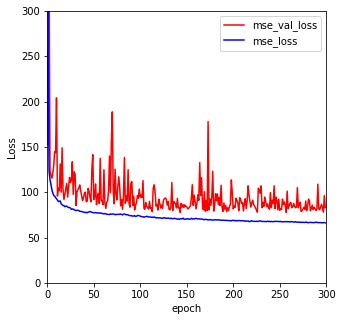

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model


In [ ]:
model = model1()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_22 (Batc (None, 32)                128       
_________________________________________________________________
activation_22 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_23 (Batc (None, 32)                128       
_________________________________________________________________
activation_23 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/300
2637/2637 [==============================] - 17s 6ms/step - loss: 7920.2974 - val_loss: 2244.9832
Epoch 2/300
2637/2637 [==============================] - 16s 6ms/step - loss: 661.2776 - val_loss: 307.3690
Epoch 3/300
2637/2637 [==============================] - 16s 6ms/step - loss: 157.8063 - val_loss: 138.5564
Epoch 4/300
2637/2637 [==============================] - 17s 6ms/step - loss: 131.3609 - val_loss: 137.7027
Epoch 5/300
2637/2637 [==============================] - 17s 6ms/step - loss: 116.9558 - val_loss: 122.2407
Epoch 6/300
2637/2637 [==============================] - 17s 6ms/step - loss: 110.5673 - val_loss: 110.1981
Epoch 7/300
2637/2637 [==============================] - 17s 6ms/step - loss: 108.8596 - val_loss: 135.1769
Epoch 8/300
2637/2637 [==============================] - 16s 6ms/step - loss: 106.5135 - val_loss: 117.7561
Epoch 9/300
2637/2637 [==============================] - 16s 6ms/step - loss: 101.4379 - val_loss: 151.3952
Epoch 10/300
2637/2637 [==

2637/2637 [==============================] - 16s 6ms/step - loss: 72.7588 - val_loss: 84.5875
Epoch 78/300
2637/2637 [==============================] - 16s 6ms/step - loss: 72.8738 - val_loss: 92.4849
Epoch 79/300
2637/2637 [==============================] - 16s 6ms/step - loss: 73.0895 - val_loss: 93.4295
Epoch 80/300
2637/2637 [==============================] - 17s 6ms/step - loss: 72.0370 - val_loss: 84.4268
Epoch 81/300
2637/2637 [==============================] - 17s 6ms/step - loss: 72.8347 - val_loss: 88.0716
Epoch 82/300
2637/2637 [==============================] - 17s 7ms/step - loss: 72.3590 - val_loss: 94.8522
Epoch 83/300
2637/2637 [==============================] - 17s 7ms/step - loss: 72.0300 - val_loss: 92.0922
Epoch 84/300
2637/2637 [==============================] - 17s 6ms/step - loss: 72.5240 - val_loss: 89.4815
Epoch 85/300
2637/2637 [==============================] - 17s 6ms/step - loss: 72.1151 - val_loss: 84.7698
Epoch 86/300
2637/2637 [==========================

2637/2637 [==============================] - 16s 6ms/step - loss: 68.8643 - val_loss: 90.1127
Epoch 154/300
2637/2637 [==============================] - 16s 6ms/step - loss: 68.8266 - val_loss: 86.4109
Epoch 155/300
2637/2637 [==============================] - 16s 6ms/step - loss: 69.4005 - val_loss: 93.9990
Epoch 156/300
2637/2637 [==============================] - 16s 6ms/step - loss: 69.2101 - val_loss: 79.6559
Epoch 157/300
2637/2637 [==============================] - 16s 6ms/step - loss: 68.9398 - val_loss: 84.2412
Epoch 158/300
2637/2637 [==============================] - 16s 6ms/step - loss: 69.2150 - val_loss: 82.8347
Epoch 159/300
2637/2637 [==============================] - 16s 6ms/step - loss: 68.9922 - val_loss: 95.3387
Epoch 160/300
2637/2637 [==============================] - 16s 6ms/step - loss: 68.9581 - val_loss: 95.7246
Epoch 161/300
2637/2637 [==============================] - 16s 6ms/step - loss: 68.6473 - val_loss: 85.0336
Epoch 162/300
2637/2637 [=================

2637/2637 [==============================] - 17s 6ms/step - loss: 67.2453 - val_loss: 80.9307
Epoch 229/300
2637/2637 [==============================] - 17s 6ms/step - loss: 67.0581 - val_loss: 98.4841
Epoch 230/300
2637/2637 [==============================] - 17s 6ms/step - loss: 67.0407 - val_loss: 82.4544
Epoch 231/300
2637/2637 [==============================] - 17s 6ms/step - loss: 66.8051 - val_loss: 88.7421
Epoch 232/300
2637/2637 [==============================] - 17s 6ms/step - loss: 66.8601 - val_loss: 85.3513
Epoch 233/300
2637/2637 [==============================] - 17s 6ms/step - loss: 67.0333 - val_loss: 91.1978
Epoch 234/300
2637/2637 [==============================] - 17s 6ms/step - loss: 67.2236 - val_loss: 79.1146
Epoch 235/300
2637/2637 [==============================] - 17s 6ms/step - loss: 66.6546 - val_loss: 144.3316
Epoch 236/300
2637/2637 [==============================] - 17s 6ms/step - loss: 66.5386 - val_loss: 81.7399
Epoch 237/300
2637/2637 [================

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  0.7852245135910326 
MAE:  6.707571142214754 
SD:  9.015337638807955


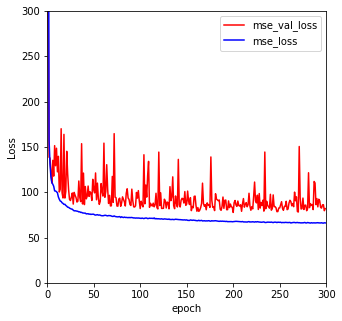

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model


In [ ]:
model = model1()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_33 (Batc (None, 32)                128       
_________________________________________________________________
activation_33 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_34 (Batc (None, 32)                128       
_________________________________________________________________
activation_34 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 16)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/300
2637/2637 [==============================] - 17s 7ms/step - loss: 6533.9707 - val_loss: 355.0341
Epoch 2/300
2637/2637 [==============================] - 17s 6ms/step - loss: 185.6121 - val_loss: 163.7294
Epoch 3/300
2637/2637 [==============================] - 17s 6ms/step - loss: 115.5572 - val_loss: 229.4985
Epoch 4/300
2637/2637 [==============================] - 17s 7ms/step - loss: 105.5518 - val_loss: 107.1111
Epoch 5/300
2637/2637 [==============================] - 17s 6ms/step - loss: 100.9250 - val_loss: 133.8469
Epoch 6/300
2637/2637 [==============================] - 17s 6ms/step - loss: 98.2660 - val_loss: 128.4071
Epoch 7/300
2637/2637 [==============================] - 17s 6ms/step - loss: 95.1736 - val_loss: 229.6508
Epoch 8/300
2637/2637 [==============================] - 17s 6ms/step - loss: 92.8209 - val_loss: 130.2637
Epoch 9/300
2637/2637 [==============================] - 17s 6ms/step - loss: 91.7616 - val_loss: 154.3812
Epoch 10/300
2637/2637 [=======

2637/2637 [==============================] - 16s 6ms/step - loss: 72.8668 - val_loss: 93.1551
Epoch 78/300
2637/2637 [==============================] - 16s 6ms/step - loss: 72.7510 - val_loss: 99.1558
Epoch 79/300
2637/2637 [==============================] - 16s 6ms/step - loss: 72.6744 - val_loss: 106.6798
Epoch 80/300
2637/2637 [==============================] - 16s 6ms/step - loss: 73.3457 - val_loss: 87.9646
Epoch 81/300
2637/2637 [==============================] - 17s 6ms/step - loss: 73.3597 - val_loss: 93.9511
Epoch 82/300
2637/2637 [==============================] - 17s 6ms/step - loss: 73.3722 - val_loss: 102.6199
Epoch 83/300
2637/2637 [==============================] - 16s 6ms/step - loss: 72.4996 - val_loss: 94.6340
Epoch 84/300
2637/2637 [==============================] - 16s 6ms/step - loss: 72.4266 - val_loss: 95.4990
Epoch 85/300
2637/2637 [==============================] - 17s 6ms/step - loss: 72.4045 - val_loss: 90.7398
Epoch 86/300
2637/2637 [========================

Epoch 153/300
2637/2637 [==============================] - 17s 6ms/step - loss: 69.5704 - val_loss: 87.9373
Epoch 154/300
2637/2637 [==============================] - 16s 6ms/step - loss: 69.6192 - val_loss: 84.7755
Epoch 155/300
2637/2637 [==============================] - 16s 6ms/step - loss: 69.4669 - val_loss: 97.8014
Epoch 156/300
2637/2637 [==============================] - 16s 6ms/step - loss: 69.3260 - val_loss: 84.6048
Epoch 157/300
2637/2637 [==============================] - 17s 6ms/step - loss: 69.0706 - val_loss: 95.3526
Epoch 158/300
2637/2637 [==============================] - 16s 6ms/step - loss: 69.1428 - val_loss: 101.6897
Epoch 159/300
2637/2637 [==============================] - 16s 6ms/step - loss: 69.0073 - val_loss: 85.8569
Epoch 160/300
2637/2637 [==============================] - 16s 6ms/step - loss: 69.2191 - val_loss: 83.3788
Epoch 161/300
2637/2637 [==============================] - 17s 6ms/step - loss: 69.0033 - val_loss: 85.6516
Epoch 162/300
2637/2637 [==

Epoch 229/300
2637/2637 [==============================] - 16s 6ms/step - loss: 67.1803 - val_loss: 79.8391
Epoch 230/300
2637/2637 [==============================] - 16s 6ms/step - loss: 67.1051 - val_loss: 82.1128
Epoch 231/300
2637/2637 [==============================] - 16s 6ms/step - loss: 67.5750 - val_loss: 81.1315
Epoch 232/300
2637/2637 [==============================] - 16s 6ms/step - loss: 67.6487 - val_loss: 95.4787
Epoch 233/300
2637/2637 [==============================] - 16s 6ms/step - loss: 67.3189 - val_loss: 94.5444
Epoch 234/300
2637/2637 [==============================] - 16s 6ms/step - loss: 66.9987 - val_loss: 81.3525
Epoch 235/300
2637/2637 [==============================] - 17s 6ms/step - loss: 67.1435 - val_loss: 82.3112
Epoch 236/300
2637/2637 [==============================] - 17s 6ms/step - loss: 66.9619 - val_loss: 79.6974
Epoch 237/300
2637/2637 [==============================] - 17s 7ms/step - loss: 67.4733 - val_loss: 89.2328
Epoch 238/300
2637/2637 [===

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -0.3080055710067139 
MAE:  6.948924093641964 
SD:  9.306388251560083


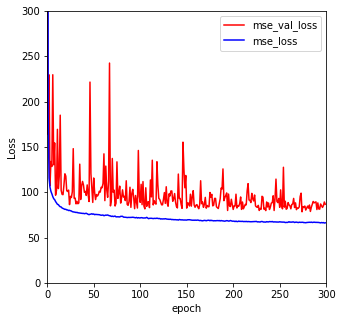

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -0.49809420402897553 
Ensemble_std:  9.06940634085405


# DBP

In [ ]:
total_me = 0
total_std = 0

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model


In [ ]:
model = model1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_44 (Batc (None, 32)                128       
_________________________________________________________________
activation_44 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_45 (Batc (None, 32)                128       
_________________________________________________________________
activation_45 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 16)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/300
2637/2637 [==============================] - 17s 7ms/step - loss: 1652.2218 - val_loss: 81.0266
Epoch 2/300
2637/2637 [==============================] - 17s 6ms/step - loss: 54.5427 - val_loss: 169.5170
Epoch 3/300
2637/2637 [==============================] - 17s 6ms/step - loss: 40.8865 - val_loss: 44.1501
Epoch 4/300
2637/2637 [==============================] - 17s 7ms/step - loss: 37.4120 - val_loss: 51.0192
Epoch 5/300
2637/2637 [==============================] - 17s 6ms/step - loss: 35.7181 - val_loss: 39.0581
Epoch 6/300
2637/2637 [==============================] - 17s 6ms/step - loss: 34.7219 - val_loss: 49.0801
Epoch 7/300
2637/2637 [==============================] - 17s 6ms/step - loss: 33.8845 - val_loss: 34.7510
Epoch 8/300
2637/2637 [==============================] - 17s 6ms/step - loss: 33.2617 - val_loss: 37.5815
Epoch 9/300
2637/2637 [==============================] - 17s 7ms/step - loss: 32.8888 - val_loss: 35.5794
Epoch 10/300
2637/2637 [===================

2637/2637 [==============================] - 17s 7ms/step - loss: 27.5918 - val_loss: 37.5849
Epoch 78/300
2637/2637 [==============================] - 17s 7ms/step - loss: 27.5526 - val_loss: 31.9026
Epoch 79/300
2637/2637 [==============================] - 17s 6ms/step - loss: 27.5434 - val_loss: 48.6350
Epoch 80/300
2637/2637 [==============================] - 17s 7ms/step - loss: 27.5695 - val_loss: 32.8703
Epoch 81/300
2637/2637 [==============================] - 17s 7ms/step - loss: 27.5347 - val_loss: 44.6808
Epoch 82/300
2637/2637 [==============================] - 17s 7ms/step - loss: 27.4683 - val_loss: 32.3088
Epoch 83/300
2637/2637 [==============================] - 17s 7ms/step - loss: 27.3637 - val_loss: 41.5944
Epoch 84/300
2637/2637 [==============================] - 17s 7ms/step - loss: 27.3398 - val_loss: 34.5828
Epoch 85/300
2637/2637 [==============================] - 17s 7ms/step - loss: 27.4059 - val_loss: 33.3413
Epoch 86/300
2637/2637 [==========================

2637/2637 [==============================] - 16s 6ms/step - loss: 26.4922 - val_loss: 33.4719
Epoch 154/300
2637/2637 [==============================] - 18s 7ms/step - loss: 26.5686 - val_loss: 30.9938
Epoch 155/300
2637/2637 [==============================] - 17s 7ms/step - loss: 26.4441 - val_loss: 34.9768
Epoch 156/300
2637/2637 [==============================] - 18s 7ms/step - loss: 26.4567 - val_loss: 34.0200
Epoch 157/300
2637/2637 [==============================] - 18s 7ms/step - loss: 26.4091 - val_loss: 32.4844
Epoch 158/300
2637/2637 [==============================] - 17s 6ms/step - loss: 26.4868 - val_loss: 35.7458
Epoch 159/300
2637/2637 [==============================] - 17s 7ms/step - loss: 26.4218 - val_loss: 31.3255
Epoch 160/300
2637/2637 [==============================] - 18s 7ms/step - loss: 26.3345 - val_loss: 32.2237
Epoch 161/300
2637/2637 [==============================] - 18s 7ms/step - loss: 26.2825 - val_loss: 30.5023
Epoch 162/300
2637/2637 [=================

Epoch 229/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.6628 - val_loss: 35.9043
Epoch 230/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.6269 - val_loss: 36.3331
Epoch 231/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.6357 - val_loss: 30.8158
Epoch 232/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.6533 - val_loss: 32.4103
Epoch 233/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.5860 - val_loss: 35.5381
Epoch 234/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.5979 - val_loss: 37.1897
Epoch 235/300
2637/2637 [==============================] - 17s 6ms/step - loss: 25.5205 - val_loss: 47.0634
Epoch 236/300
2637/2637 [==============================] - 17s 6ms/step - loss: 25.6911 - val_loss: 32.5514
Epoch 237/300
2637/2637 [==============================] - 17s 6ms/step - loss: 25.6680 - val_loss: 33.9641
Epoch 238/300
2637/2637 [===

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  1.7721282522003154 
MAE:  4.306871194640915 
SD:  5.520500364995231


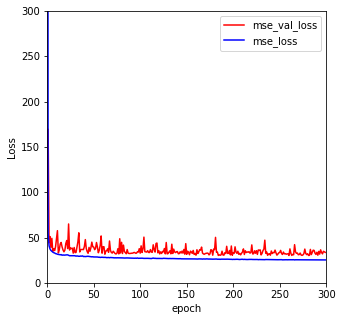

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model


In [ ]:
model = model1()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_55 (Batc (None, 32)                128       
_________________________________________________________________
activation_55 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_56 (Batc (None, 32)                128       
_________________________________________________________________
activation_56 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 16)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/300
2637/2637 [==============================] - 17s 6ms/step - loss: 1481.5334 - val_loss: 85.2369
Epoch 2/300
2637/2637 [==============================] - 17s 6ms/step - loss: 57.6169 - val_loss: 50.9544
Epoch 3/300
2637/2637 [==============================] - 16s 6ms/step - loss: 42.7021 - val_loss: 45.8476
Epoch 4/300
2637/2637 [==============================] - 16s 6ms/step - loss: 38.7028 - val_loss: 40.5406
Epoch 5/300
2637/2637 [==============================] - 16s 6ms/step - loss: 36.8555 - val_loss: 42.8897
Epoch 6/300
2637/2637 [==============================] - 16s 6ms/step - loss: 35.6517 - val_loss: 38.6370
Epoch 7/300
2637/2637 [==============================] - 16s 6ms/step - loss: 34.5758 - val_loss: 45.9770
Epoch 8/300
2637/2637 [==============================] - 16s 6ms/step - loss: 33.8046 - val_loss: 43.7592
Epoch 9/300
2637/2637 [==============================] - 16s 6ms/step - loss: 33.0503 - val_loss: 58.7530
Epoch 10/300
2637/2637 [====================

2637/2637 [==============================] - 16s 6ms/step - loss: 27.1845 - val_loss: 32.4681
Epoch 78/300
2637/2637 [==============================] - 17s 6ms/step - loss: 27.0957 - val_loss: 32.5467
Epoch 79/300
2637/2637 [==============================] - 17s 6ms/step - loss: 27.2245 - val_loss: 35.8505
Epoch 80/300
2637/2637 [==============================] - 17s 6ms/step - loss: 26.9927 - val_loss: 33.1247
Epoch 81/300
2637/2637 [==============================] - 16s 6ms/step - loss: 26.8398 - val_loss: 32.6032
Epoch 82/300
2637/2637 [==============================] - 16s 6ms/step - loss: 26.9261 - val_loss: 44.8841
Epoch 83/300
2637/2637 [==============================] - 16s 6ms/step - loss: 26.8732 - val_loss: 35.0448
Epoch 84/300
2637/2637 [==============================] - 16s 6ms/step - loss: 26.9023 - val_loss: 37.8196
Epoch 85/300
2637/2637 [==============================] - 16s 6ms/step - loss: 26.8632 - val_loss: 36.0139
Epoch 86/300
2637/2637 [==========================

2637/2637 [==============================] - 16s 6ms/step - loss: 25.9246 - val_loss: 31.7568
Epoch 154/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.8719 - val_loss: 33.1308
Epoch 155/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.7887 - val_loss: 32.9795
Epoch 156/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.9020 - val_loss: 38.0063
Epoch 157/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.7194 - val_loss: 34.5659
Epoch 158/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.7971 - val_loss: 34.1874
Epoch 159/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.8368 - val_loss: 31.7402
Epoch 160/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.8314 - val_loss: 33.4013
Epoch 161/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.8032 - val_loss: 31.5817
Epoch 162/300
2637/2637 [=================

Epoch 229/300
2637/2637 [==============================] - 17s 6ms/step - loss: 25.3050 - val_loss: 38.3424
Epoch 230/300
2637/2637 [==============================] - 17s 6ms/step - loss: 25.4113 - val_loss: 37.5011
Epoch 231/300
2637/2637 [==============================] - 17s 6ms/step - loss: 25.4161 - val_loss: 32.2085
Epoch 232/300
2637/2637 [==============================] - 17s 6ms/step - loss: 25.3311 - val_loss: 33.4415
Epoch 233/300
2637/2637 [==============================] - 17s 6ms/step - loss: 25.1634 - val_loss: 30.4081
Epoch 234/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.2918 - val_loss: 32.7427
Epoch 235/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.3634 - val_loss: 31.1694
Epoch 236/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.3584 - val_loss: 33.7114
Epoch 237/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.3746 - val_loss: 31.2042
Epoch 238/300
2637/2637 [===

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  0.06656703574668575 
MAE:  4.181968086550382 
SD:  5.650587408508971


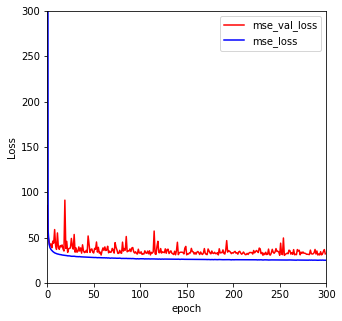

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model


In [ ]:
model = model1()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_66 (Batc (None, 32)                128       
_________________________________________________________________
activation_66 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_67 (Batc (None, 32)                128       
_________________________________________________________________
activation_67 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 16)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/300
2637/2637 [==============================] - 17s 6ms/step - loss: 1654.8414 - val_loss: 87.6528
Epoch 2/300
2637/2637 [==============================] - 16s 6ms/step - loss: 60.7237 - val_loss: 45.6165
Epoch 3/300
2637/2637 [==============================] - 16s 6ms/step - loss: 43.0740 - val_loss: 46.2403
Epoch 4/300
2637/2637 [==============================] - 16s 6ms/step - loss: 39.6420 - val_loss: 60.9226
Epoch 5/300
2637/2637 [==============================] - 16s 6ms/step - loss: 37.3198 - val_loss: 133.4979
Epoch 6/300
2637/2637 [==============================] - 16s 6ms/step - loss: 36.0424 - val_loss: 39.4369
Epoch 7/300
2637/2637 [==============================] - 16s 6ms/step - loss: 35.0662 - val_loss: 54.9779
Epoch 8/300
2637/2637 [==============================] - 16s 6ms/step - loss: 34.3632 - val_loss: 37.9750
Epoch 9/300
2637/2637 [==============================] - 16s 6ms/step - loss: 34.0592 - val_loss: 67.9022
Epoch 10/300
2637/2637 [===================

2637/2637 [==============================] - 16s 6ms/step - loss: 27.6363 - val_loss: 33.8054
Epoch 78/300
2637/2637 [==============================] - 16s 6ms/step - loss: 27.6546 - val_loss: 41.8167
Epoch 79/300
2637/2637 [==============================] - 16s 6ms/step - loss: 27.7816 - val_loss: 34.7818
Epoch 80/300
2637/2637 [==============================] - 16s 6ms/step - loss: 27.5883 - val_loss: 40.1211
Epoch 81/300
2637/2637 [==============================] - 16s 6ms/step - loss: 27.5220 - val_loss: 33.6433
Epoch 82/300
2637/2637 [==============================] - 16s 6ms/step - loss: 27.6269 - val_loss: 40.8143
Epoch 83/300
2637/2637 [==============================] - 16s 6ms/step - loss: 27.7336 - val_loss: 32.3333
Epoch 84/300
2637/2637 [==============================] - 16s 6ms/step - loss: 27.6328 - val_loss: 36.3784
Epoch 85/300
2637/2637 [==============================] - 16s 6ms/step - loss: 27.4786 - val_loss: 32.8066
Epoch 86/300
2637/2637 [==========================

2637/2637 [==============================] - 16s 6ms/step - loss: 26.5053 - val_loss: 32.9116
Epoch 154/300
2637/2637 [==============================] - 16s 6ms/step - loss: 26.4511 - val_loss: 32.3906
Epoch 155/300
2637/2637 [==============================] - 16s 6ms/step - loss: 26.3670 - val_loss: 33.2407
Epoch 156/300
2637/2637 [==============================] - 16s 6ms/step - loss: 26.3134 - val_loss: 31.6382
Epoch 157/300
2637/2637 [==============================] - 16s 6ms/step - loss: 26.4198 - val_loss: 33.0108
Epoch 158/300
2637/2637 [==============================] - 16s 6ms/step - loss: 26.4044 - val_loss: 32.2715
Epoch 159/300
2637/2637 [==============================] - 16s 6ms/step - loss: 26.3758 - val_loss: 32.2959
Epoch 160/300
2637/2637 [==============================] - 16s 6ms/step - loss: 26.3602 - val_loss: 35.1841
Epoch 161/300
2637/2637 [==============================] - 16s 6ms/step - loss: 26.1919 - val_loss: 37.3851
Epoch 162/300
2637/2637 [=================

2637/2637 [==============================] - 16s 6ms/step - loss: 25.7637 - val_loss: 33.2409
Epoch 229/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.7514 - val_loss: 36.3367
Epoch 230/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.8687 - val_loss: 32.1262
Epoch 231/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.8354 - val_loss: 41.6654
Epoch 232/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.6953 - val_loss: 31.7716
Epoch 233/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.8672 - val_loss: 32.0009
Epoch 234/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.6084 - val_loss: 33.8159
Epoch 235/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.7759 - val_loss: 39.0628
Epoch 236/300
2637/2637 [==============================] - 16s 6ms/step - loss: 25.7708 - val_loss: 31.9761
Epoch 237/300
2637/2637 [=================

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -1.0240847036660259 
MAE:  4.24585262097823 
SD:  5.6545916631138216


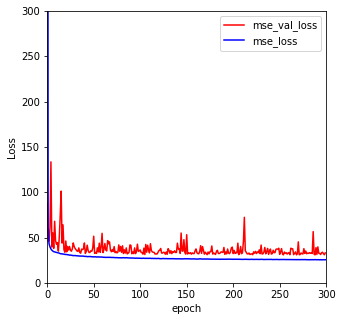

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  0.27153686142699174 
Ensemble_std:  5.608559812206008
